# PCA MSC

In [1]:
include("/Net/Groups/BGI/people/gkraemer/progs/data_cube/julia/notebooks/stuff.jl")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8580107013801837190\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11422467067034594255\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/user/gkraemer//assetserver/549eec07f928a744cd5cefcd9652eb9af414188d-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-8580107013801837190\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

┌ Warning: Package RCall does not have AxisArrays in its dependencies:
│ - If you have RCall checked out for development and have
│   added AxisArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RCall
│ Loading AxisArrays into RCall from project dependency, future warnings for RCall are suppressed.
└ @ nothing nothing:840
┌ Warning: RCall.jl: Loading required package: sp
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Checking rgeos availability: TRUE
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Loading required package: zoo
│ 
│ Attaching package: 'zoo'
│ 
│ The following objects are masked from 'package:base':
│ 
│     as.Date, as.Date.numeric
│ 
│ Loading required package: sandwich
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packag

PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 

In [2]:
cube_z_trans = load(joinpath(cubes_base_dir, "z_trans_pca.jld2"), "z_trans")
cube_pca = load(joinpath(cubes_base_dir, "z_trans_pca.jld2"), "pca")
cube_pca_online = loadCube(joinpath(cubes_base_dir, "cube_pca_online"))
pca_no_msc_cube = loadCube(joinpath(cubes_base_dir, "pca_no_msc_cube"))
pca_msc_cube = loadCube(joinpath(cubes_base_dir, "pca_msc_cube"))
cube_extrema_msc = loadCube(joinpath(cubes_base_dir, "cube_extrema_msc"))
cube_extrema_no_msc = loadCube(joinpath(cubes_base_dir, "cube_extrema_no_msc"))

Memory mapped cube with the following dimensions
Extrema             Axis with 2 elements: min max 
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Total size: 120.0 bytes


In [3]:
n_seasons = 4
comp = 1
doy_idxs = (length(getAxis(MSCAxis, pca_msc_cube)) ÷ n_seasons) .* (0:n_seasons - 1) .+ 1 |> collect
ex_msc = [
    cube_extrema_msc[:, i] |> 
    x -> abs.(x) |> 
    x -> max(x...) |> 
    x -> (-x, x) 
    for i in 1:size(cube_extrema_msc, 2)
]
ex_no_msc = [
    cube_extrema_no_msc[:, i] |> 
    x -> abs.(x) |>
    x -> max(x...) |> 
    x -> (-x, x) 
    for i in 1:size(cube_extrema_no_msc, 2)
]

12-element Array{Tuple{Float32,Float32},1}:
 (-5.2254515, 5.2254515)  
 (-4.324888, 4.324888)    
 (-5.6254683, 5.6254683)  
 (-2.8615625, 2.8615625)  
 (-5.3716016, 5.3716016)  
 (-3.310431, 3.310431)    
 (-3.1275787, 3.1275787)  
 (-1.5339583, 1.5339583)  
 (-4.438035, 4.438035)    
 (-1.7250496, 1.7250496)  
 (-1.4934131, 1.4934131)  
 (-0.89296293, 0.89296293)

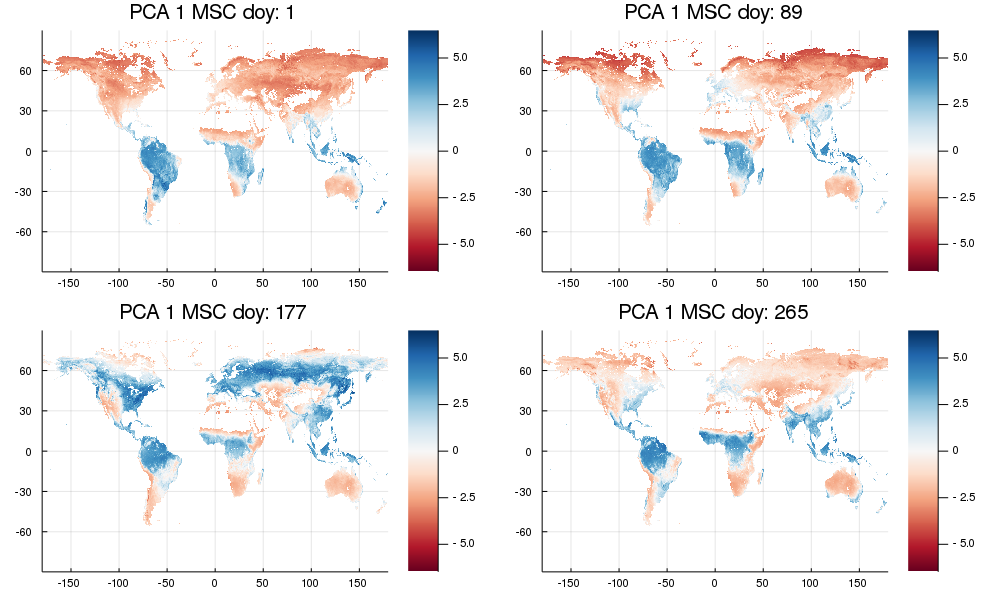

GKS: invalid bitmap size
GKS: invalid bitmap size
GKS: invalid bitmap size
GKS: invalid bitmap size


In [4]:
comp = 1
doy_pca_plots = map(doy_idxs) do doy_idx
    doy = dayofyear(getAxis(MSCAxis, pca_msc_cube).values[doy_idx])
    heatmap(
        getAxis(LonAxis, pca_msc_cube).values,
        getAxis(LatAxis, pca_msc_cube).values,
        pca_msc_cube[doy_idx, comp, :, :] |> 
            x -> convert(Array{Union{Float32, Missing}}, x) |> 
            missing_to_nan |> 
            drop_size_one_dims |> 
            rotl90 |>
            x -> begin x[1:2] .= ex_msc[comp]; x end,
        title = "PCA $comp MSC doy: $doy",
        color = :RdBu
    )
end
plot(
    doy_pca_plots..., 
    fmt = :png, 
    size = (1000, 600)
)

In [5]:
MIME("image/png"),width=6*72,height=5*72comp = 2
doy_pca_plots = map(doy_idxs) do doy_idx
    doy = dayofyear(getAxis(MSCAxis, pca_msc_cube).values[doy_idx])
    heatmap(
        getAxis(LonAxis, pca_msc_cube).values,
        getAxis(LatAxis, pca_msc_cube).values,
        pca_msc_cube[doy_idx, comp, :, :] |> 
            x -> convert(Array{Union{Float32, Missing}}, x) |> 
            missing_to_nan |> 
            drop_size_one_dims |> 
            rotl90 |>
            x -> begin x[1:2] .= ex_msc[comp]; x end,
        title = "PCA $comp MSC doy: $doy",
        color = :RdBu
    )
end
plot(
    doy_pca_plots..., 
    fmt = :png, 
    size = (1000, 600)
)

ErrorException: syntax: "5" is not a valid function argument name

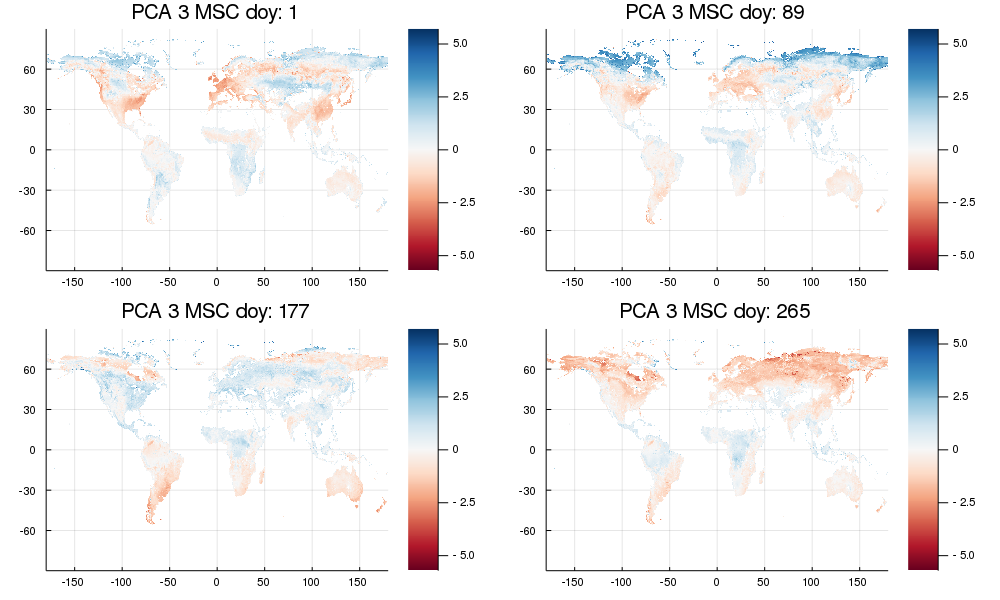

GKS: invalid bitmap size
GKS: invalid bitmap size
GKS: invalid bitmap size
GKS: invalid bitmap size


In [6]:
comp = 3
doy_pca_plots = map(doy_idxs) do doy_idx
    doy = dayofyear(getAxis(MSCAxis, pca_msc_cube).values[doy_idx])
    heatmap(
        getAxis(LonAxis, pca_msc_cube).values,
        getAxis(LatAxis, pca_msc_cube).values,
        pca_msc_cube[doy_idx, comp, :, :] |> 
            x -> convert(Array{Union{Float32, Missing}}, x) |> 
            missing_to_nan |> 
            drop_size_one_dims |> 
            rotl90 |>
            x -> begin x[1:2] .= ex_msc[comp]; x end,
        title = "PCA $comp MSC doy: $doy",
        color = :RdBu
    )
end
plot(
    doy_pca_plots..., 
    fmt = :png, 
    size = (1000, 600)
)

┌ Warning: RCall.jl: Warning in rgdal::rawTransform(projto_int, projfrom, nrow(xy), xy[, 1],  :
│   154222 projected point(s) not finite
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Warning in rgdal::rawTransform(projto_int, projfrom, nrow(xy), xy[, 1],  :
│   154222 projected point(s) not finite
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Warning in rgdal::rawTransform(projto_int, projfrom, nrow(xy), xy[, 1],  :
│   154222 projected point(s) not finite
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Warning in rgdal::rawTransform(projto_int, projfrom, nrow(xy), xy[, 1],  :
│   154222 projected point(s) not finite
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Warning in rgdal::rawTransform(projto_int, projfrom, nrow(xy), 

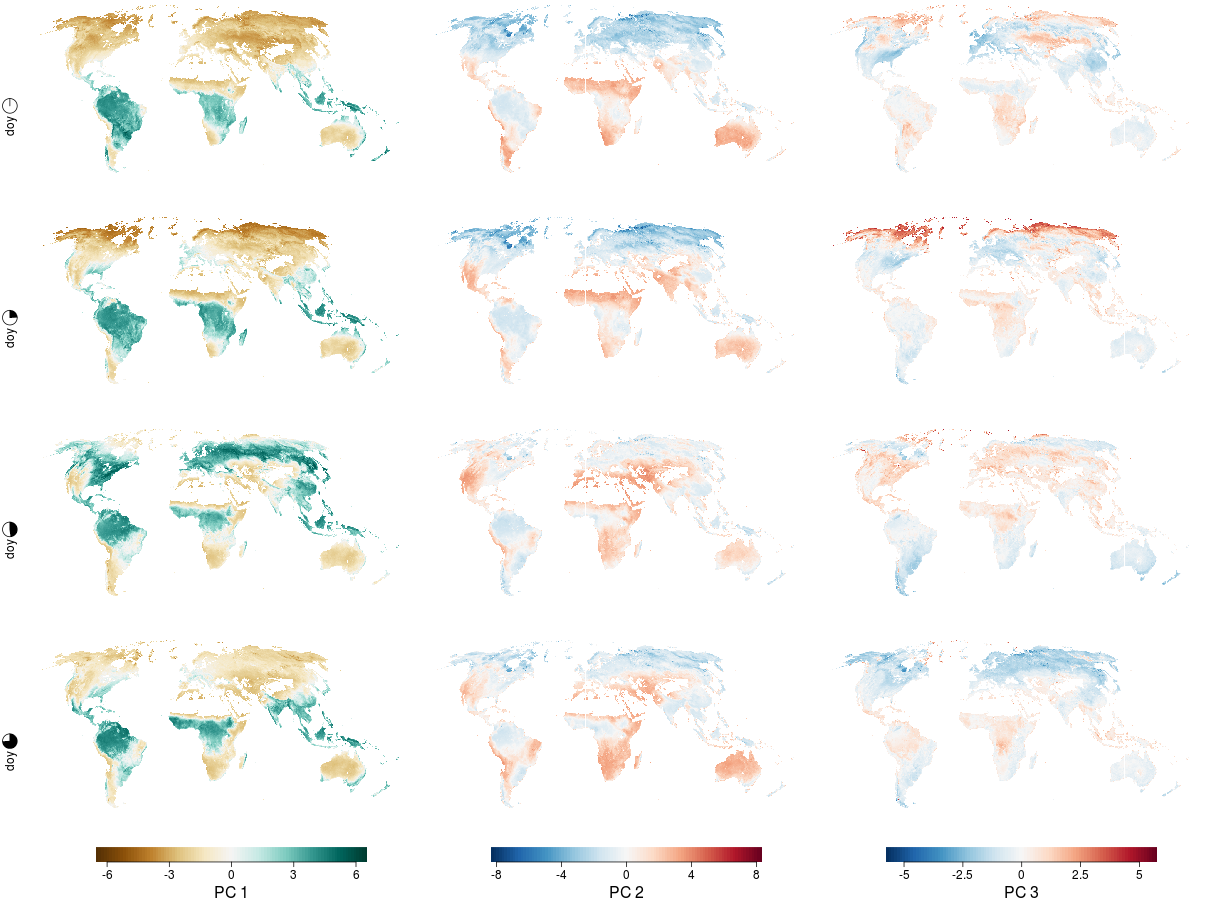

RObject{RealSxp}
[1] 0.06224829 0.28112415 0.50000000 0.71887585 0.93775171


In [7]:
R"""

options(device = function(filename=getOption('rcalljl_filename'),...) png(filename, width = 1205, height = 900, ...))

pal1 <- (c("#543005", "#8C510A", "#BF812D", "#DFC27D", 
             "#F6E8C3", "#F5F5F5", "#C7EAE5", "#80CDC1", 
             "#35978F", "#01665E", "#003C30"))
pal1 <- colorRampPalette(colors = pal1)(100)

pal2 <- rev(c("#67001f", "#b2182b","#d6604d", "#f4a582",
          "#fddbc7", "#f7f7f7", "#d1e5f0","#92c5de",
          "#4393c3", "#2166ac","#053061"))
pal2 <- colorRampPalette(colors = pal2)(100)

r2a <- function(x) {
    x <- as.array(x)
    x <- x[, image_x_min_col:1440,1]
    x <- t(x)[,dim(x)[1]:1]
}


label_cex <- 2
scale_cex <- 1.5
image_x_min_col <- 200


prog <- function(x, max) {
    x <- x - 1
    pie(c(x / max, 1 - x / max), clockwise = TRUE, labels = NA, col = c("#000000", "#FFFFFF"))
    text(0, -1.1, "doy", adj = c(1, 0.5), srt = 90, cex = scale_cex)
}

asp_man <- 720 / (1440 - image_x_min_col)

map1 <- t($(pca_msc_cube[ 1, 1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))
map2 <- t($(pca_msc_cube[12, 1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))
map3 <- t($(pca_msc_cube[23, 1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))
map4 <- t($(pca_msc_cube[35, 1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))

map5 <- t($(pca_msc_cube[ 1, 2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))
map6 <- t($(pca_msc_cube[12, 2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))
map7 <- t($(pca_msc_cube[23, 2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))
map8 <- t($(pca_msc_cube[35, 2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))

map9 <- t($(pca_msc_cube[ 1, 3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))
map10 <- t($(pca_msc_cube[12, 3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))
map11 <- t($(pca_msc_cube[23, 3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))
map12 <- t($(pca_msc_cube[35, 3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64))

ex1 <- $([Float64.(ex_msc[1])...])
ex2 <- $([Float64.(ex_msc[2])...])
ex3 <- $([Float64.(ex_msc[3])...])

org_crs <- CRS("+proj=longlat +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +no_defs")
new_crs <- CRS("+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84")

org_raster1 <- raster(map1, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
org_raster2 <- raster(map2, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
org_raster3 <- raster(map3, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
org_raster4 <- raster(map4, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)

org_raster5 <- raster(map5, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
org_raster6 <- raster(map6, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
org_raster7 <- raster(map7, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
org_raster8 <- raster(map8, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)

org_raster9 <- raster(map9, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
org_raster10 <- raster(map10, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
org_raster11 <- raster(map11, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
org_raster12 <- raster(map12, crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)

new_raster1 <- projectExtent(org_raster1, new_crs)
new_raster1 <- projectRaster(org_raster1, new_raster1)
new_raster2 <- projectExtent(org_raster2, new_crs)
new_raster2 <- projectRaster(org_raster2, new_raster2)
new_raster3 <- projectExtent(org_raster3, new_crs)
new_raster3 <- projectRaster(org_raster3, new_raster3)
new_raster4 <- projectExtent(org_raster4, new_crs)
new_raster4 <- projectRaster(org_raster4, new_raster4)

new_raster5 <- projectExtent(org_raster5, new_crs)
new_raster5 <- projectRaster(org_raster5, new_raster5)
new_raster6 <- projectExtent(org_raster6, new_crs)
new_raster6 <- projectRaster(org_raster6, new_raster6)
new_raster7 <- projectExtent(org_raster7, new_crs)
new_raster7 <- projectRaster(org_raster7, new_raster7)
new_raster8 <- projectExtent(org_raster8, new_crs)
new_raster8 <- projectRaster(org_raster8, new_raster8)

new_raster9 <- projectExtent(org_raster9, new_crs)
new_raster9 <- projectRaster(org_raster9, new_raster9)
new_raster10 <- projectExtent(org_raster10, new_crs)
new_raster10 <- projectRaster(org_raster10, new_raster10)
new_raster11 <- projectExtent(org_raster11, new_crs)
new_raster11 <- projectRaster(org_raster11, new_raster11)
new_raster12 <- projectExtent(org_raster12, new_crs)
new_raster12 <- projectRaster(org_raster12, new_raster12)

#plot(new_raster)
layout(matrix(1:20, nrow = 5, ncol = 4), heights = c(1, 1, 1, 1, 0.25), widths = c(0.05, 1, 1, 1))
par(mar = c(0,0,0,0))
#plot.new(); text(x = 0.5, y = 0.5, srt = 90, cex = label_cex, label = "doy 1")
#plot.new(); text(x = 0.5, y = 0.5, srt = 90, cex = label_cex, label = "doy 89")
#plot.new(); text(x = 0.5, y = 0.5, srt = 90, cex = label_cex, label = "doy 177")
#plot.new(); text(x = 0.5, y = 0.5, srt = 90, cex = label_cex, label = "doy 273")
prog(1, 46)
prog(12, 46)
prog(23, 46)
prog(35, 46)
plot.new()
image(r2a(new_raster1), zlim = ex1, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal1)
image(r2a(new_raster2), zlim = ex1, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal1)
image(r2a(new_raster3), zlim = ex1, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal1)
image(r2a(new_raster4), zlim = ex1, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal1)

par(mar = c(4, 8, 0, 5))
image(matrix(1:100), col = pal1, axes = FALSE, bty = 'n', xlab = "PC 1", cex.lab = label_cex)
axis(1, 
     at = seq(    (ceiling(ex1[1]) - ex1[1]) / (ex1[2] - ex1[1]), 
              1 - (ex1[2] - floor(ex1[2]))   / (ex1[2] - ex1[1]), 
              length.out = 5),
     labels = seq(ceiling(ex1[1]), floor(ex1[2]), length.out = 5),
     cex.axis = scale_cex)

par(mar = c(0,0,0,0))
image(r2a(new_raster5), zlim = ex2, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2)
image(r2a(new_raster6), zlim = ex2, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2)
image(r2a(new_raster7), zlim = ex2, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2)
image(r2a(new_raster8), zlim = ex2, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2)

par(mar = c(4, 8, 0, 5))
image(matrix(1:100), col = pal2, axes = FALSE, bty = 'n', xlab = "PC 2", cex.lab = label_cex)
axis(1, 
     at = seq(    (ceiling(ex2[1]) - ex2[1]) / (ex2[2] - ex2[1]), 
              1 - (ex2[2] - floor(ex2[2]))   / (ex2[2] - ex2[1]), 
              length.out = 5),
     labels = seq(ceiling(ex2[1]), floor(ex2[2]), length.out = 5),
     cex.axis = scale_cex)

par(mar = c(0,0,0,0))
image(r2a(new_raster9), zlim = ex3, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2)
image(r2a(new_raster10), zlim = ex3, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2)
image(r2a(new_raster11), zlim = ex3, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2)
image(r2a(new_raster12), zlim = ex3, asp = asp_man, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2)

par(mar = c(4, 8, 0, 5))
image(matrix(1:100), col = pal2, axes = FALSE, bty = 'n', xlab = "PC 3", cex.lab = label_cex)
axis(1, 
     at = seq(    (ceiling(ex3[1]) - ex3[1]) / (ex3[2] - ex3[1]), 
              1 - (ex3[2] - floor(ex3[2]))   / (ex3[2] - ex3[1]), 
              length.out = 5),
     labels = seq(ceiling(ex3[1]), floor(ex3[2]), length.out = 5),
     cex.axis = scale_cex)
"""

In [10]:
R"""
pdf($(joinpath(fig_path, "msc_doy.pdf")), width = 12.05, height = 9)
data(coastsCoarse, package = "rworldmap")

pal1 <- c("#543005", "#8C510A", "#BF812D", "#DFC27D", 
          "#F6E8C3", "#F5F5F5", "#C7EAE5", "#80CDC1", 
          "#35978F", "#01665E", "#003C30")
pal1 <- colorRampPalette(colors = pal1)(100)

pal2 <- rev(c("#67001f", "#b2182b","#d6604d", "#f4a582",
              "#fddbc7", "#f7f7f7", "#d1e5f0","#92c5de",
              "#4393c3", "#2166ac","#053061"))
pal2 <- colorRampPalette(colors = pal2)(100)

pal3 <- c("#7f3b08","#b35806","#e08214","#fdb863",
          "#fee0b6","#f7f7f7","#d8daeb","#b2abd2",
          "#8073ac","#542788","#2d004b")
pal3 <- colorRampPalette(colors = pal3)(100)

r2a <- function(x) {
    x <- as.array(x)
    x <- x[1:600, image_x_min_col:1340, 1]
    x <- t(x)[,dim(x)[1]:1]
}


label_cex <- 1.5
scale_cex <- 1.3
image_x_min_col <- 250

doy_to_date <- function(doi) {
    format(as.Date(doi - 1, origin = "2016-01-01"), "%d %b")
}


prog <- function(x, max) {
    #x <- x - 1
    #pie(c(x / max, 1 - x / max), clockwise = TRUE, labels = NA, col = c("#000000", "#FFFFFF"))
    #plot(1:2, 1:2, type = "n", bty = "n", axes = FALSE)
    plot.new()
    text(0.5, 0.5, paste(doy_to_date((x - 1) * 8 + 1)), adj = c(0.5, 0.5), srt = 90, cex = scale_cex, xpd = NA)
}

clamp <- function(x, lims) {
    lo <- lims[1]
    hi <- lims[2]
    res <- x
    res[res < lo] <- lo
    res[res > hi] <- hi
    return(res)
}

rotr90 <- function(x) t(x[dim(x)[1]:1,])

asp_man <- 600 / (1340 - image_x_min_col)

clamp_fac <- 0.7
ex1 <- $([Float64.(ex_msc[1])...]) * clamp_fac
ex2 <- $([Float64.(ex_msc[2])...]) * clamp_fac
ex3 <- $([Float64.(ex_msc[3])...]) * clamp_fac

map1 <- clamp(t($(pca_msc_cube[ 1, 1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)
map2 <- clamp(t($(pca_msc_cube[12, 1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)
map3 <- clamp(t($(pca_msc_cube[23, 1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)
map4 <- clamp(t($(pca_msc_cube[35, 1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)

map5 <- clamp(t($(pca_msc_cube[ 1, 2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)
map6 <- clamp(t($(pca_msc_cube[12, 2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)
map7 <- clamp(t($(pca_msc_cube[23, 2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)
map8 <- clamp(t($(pca_msc_cube[35, 2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)

map9  <- clamp(t($(pca_msc_cube[ 1, 3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)
map10 <- clamp(t($(pca_msc_cube[12, 3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)
map11 <- clamp(t($(pca_msc_cube[23, 3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)
map12 <- clamp(t($(pca_msc_cube[35, 3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)), ex1)


layout(matrix(1:20, nrow = 5, ncol = 4), 
       heights = c(1, 1, 1, 1, 0.3), 
       widths = c(0.05, 1, 1, 1))
par(mar = c(0, 0, 0, 0))
prog(1, 46)
prog(12, 46)
prog(23, 46)
prog(35, 46)
plot.new()
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map1)[,100:720], zlim = ex1, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal1, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map2)[,100:720], zlim = ex1, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal1, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map3)[,100:720], zlim = ex1, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal1, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map4)[,100:720], zlim = ex1, abty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal1, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)

par(mar = c(4, 7, 0, 4))
image(matrix(1:100), col = pal1, axes = FALSE, bty = 'n', 
      xlab = expression(low~productivity %<-% PC[1] %->% high~productivity), 
      cex.lab = label_cex, useRaster = TRUE)
axis(1, 
     at = seq(    (ceiling(ex1[1]) - ex1[1]) / (ex1[2] - ex1[1]), 
              1 - (ex1[2] - floor(ex1[2]))   / (ex1[2] - ex1[1]), 
              length.out = 5),
     labels = seq(ceiling(ex1[1]), floor(ex1[2]), length.out = 5),
     cex.axis = scale_cex)

par(mar = c(0, 0, 0, 0))
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map5)[,100:720], zlim = ex2, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map6)[,100:720], zlim = ex2, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map7)[,100:720], zlim = ex2, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map8)[,100:720], zlim = ex2, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal2, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)

par(mar = c(4, 7, 0, 4))
image(matrix(1:100), col = pal2, axes = FALSE, bty = 'n', 
      xlab = expression(wet %<-% PC[2] %->% dry), 
      cex.lab = label_cex, useRaster = TRUE)
axis(1, 
     at = seq(    (ceiling(ex2[1]) - ex2[1]) / (ex2[2] - ex2[1]), 
              1 - (ex2[2] - floor(ex2[2]))   / (ex2[2] - ex2[1]), 
              length.out = 5),
     labels = seq(ceiling(ex2[1]), floor(ex2[2]), length.out = 5),
     cex.axis = scale_cex)

par(mar = c(0, 0, 0, 0))
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map9 )[,100:720], zlim = ex3, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal3, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map10)[,100:720], zlim = ex3, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal3, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map11)[,100:720], zlim = ex3, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal3, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-65, 90, by = 0.25), rotr90(map12)[,100:720], zlim = ex3, bty = 'n', axes = FALSE, xlab = NA, ylab = NA, col = pal3, useRaster = TRUE)
plot(coastsCoarse, add = TRUE)

par(mar = c(4, 7, 0, 4))
image(matrix(1:100), col = pal3, axes = FALSE, bty = 'n', 
      xlab = expression(dark %<-% PC[3] %->% light), 
      cex.lab = label_cex, useRaster = TRUE)
axis(1, 
     at = seq(    (ceiling(ex3[1]) - ex3[1]) / (ex3[2] - ex3[1]), 
              1 - (ex3[2] - floor(ex3[2]))   / (ex3[2] - ex3[1]), 
              length.out = 5),
     labels = seq(ceiling(ex3[1]), floor(ex3[2]), length.out = 5),
     cex.axis = scale_cex)

grid.text("(a)", 0,   1,                         just = c(-1, 1))
grid.text("(b)", 1/3, 1,                         just = c(-1, 1))
grid.text("(c)", 2/3, 1,                         just = c(-1, 1))

grid.text("(d)", 0,   3/4 * 4 / 4.3 + 0.3 / 4.3, just = c(-1, 1))
grid.text("(e)", 1/3, 3/4 * 4 / 4.3 + 0.3 / 4.3, just = c(-1, 1))
grid.text("(f)", 2/3, 3/4 * 4 / 4.3 + 0.3 / 4.3, just = c(-1, 1))

grid.text("(g)", 0,   2/4 * 4 / 4.3 + 0.3 / 4.3, just = c(-1, 1))
grid.text("(h)", 1/3, 2/4 * 4 / 4.3 + 0.3 / 4.3, just = c(-1, 1))
grid.text("(i)", 2/3, 2/4 * 4 / 4.3 + 0.3 / 4.3, just = c(-1, 1))


grid.text("(j)", 0,   1/4 * 4 / 4.3 + 0.3 / 4.3, just = c(-1, 1))
grid.text("(k)", 1/3, 1/4 * 4 / 4.3 + 0.3 / 4.3, just = c(-1, 1))
grid.text("(l)", 2/3, 1/4 * 4 / 4.3 + 0.3 / 4.3, just = c(-1, 1))


dev.off()
"""
show_pdf(
    "https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/msc_doy.pdf",
    width = 900,
    height = 900
)

┌ Warning: RCall.jl: Warning in plot.window(...) : "abty" is not a graphical parameter
│ Warning in plot.xy(xy, type, ...) : "abty" is not a graphical parameter
│ Warning in title(...) : "abty" is not a graphical parameter
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113


(object { attributes=Dict(:type=>"application/pdf",:height=>"900",:data=>"https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/msc_doy.pdf",:width=>"900") }
  "pdf not found")

In [8]:
#if false # !isfile(joinpath(@__DIR__, "msc_pc1.mp4"))
R"""
saveVideo({

    pal <- rev(c("#543005", "#8C510A", "#BF812D", "#DFC27D", 
                 "#F6E8C3", "#F5F5F5", "#C7EAE5", "#80CDC1", 
                 "#35978F", "#01665E", "#003C30"))
    pal <- colorRampPalette(colors = pal)(100)

    r2a <- function(x) {
        x <- as.array(x)
        x <- x[, image_x_min_col:1440,1]
        x <- t(x)[,dim(x)[1]:1]
    }


    label_cex <- 2
    scale_cex <- 1.5
    image_x_min_col <- 200


    prog <- function(x, max) {
        x <- x - 1
        pie(c(x / max, 1 - x / max), clockwise = TRUE, labels = NA, col = c("#000000", "#FFFFFF"))
        text(0, -1.1, "doy", adj = c(1, 0.5), srt = 90, cex = scale_cex)
    }

    asp_man <- 720 / (1440 - image_x_min_col)

    map <- $(
        pca_msc_cube[:, 1, :, :] |> 
            x -> convert(Array, x) |> 
            missing_to_nan .|>
            Float64 |> 
            x -> permutedims(x, (1, 3, 2))
    )

    ex <- $([Float64.(ex_msc[1])...])

    org_crs <- CRS("+proj=longlat +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +no_defs")
    new_crs <- CRS("+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84")

    for (i in 1:dim(map)[1]) {
        cat("\r frames: ", i, "/", 46, "                                ")

        org_raster <- raster(map[i, , ], crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
        new_raster <- projectExtent(org_raster, new_crs)
        new_raster <- projectRaster(org_raster, new_raster)

        layout(matrix(1:4, nrow = 2, ncol = 2), heights = c(1, 0.25), widths = c(0.05, 1))
        par(mar = c(0,0,0,0))
        prog(i, 46)
        plot.new()

        image(r2a(new_raster), 
              zlim = ex,
              asp = asp_man, 
              bty = 'n', 
              axes = FALSE, 
              xlab = NA, ylab = NA, col = pal)

        par(mar = c(4, 8, 0, 5))
        image(matrix(1:100), col = pal, axes = FALSE, bty = 'n', xlab = "PC 1", cex.lab = label_cex)

        axis(1, 
             at = seq(    (ceiling(ex[1]) - ex[1]) / (ex[2] - ex[1]), 
                      1 -   (ex[2] - floor(ex[2])) / (ex[2] - ex[1]), 
                      length.out = 5),
             labels = seq(ceiling(ex[1]), floor(ex[2]), length.out = 5),
             cex.axis = scale_cex)
    }}, 
    video.name = "msc_pc1.mp4",
    ani.width = 900,
    ani.height = 600,
    interval = 0.5
)
""";
#end # if

 frames:  46 / 46                                 / 46                                  46                                                                  

ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --

<video width="600" controls src="msc_pc1.mp4" />

In [9]:
#if false # !isfile(joinpath(@__DIR__, "msc_pc2.mp4"))
R"""
saveVideo({

    pal <- c("#67001f", "#b2182b","#d6604d", "#f4a582",
              "#fddbc7", "#f7f7f7", "#d1e5f0","#92c5de",
              "#4393c3", "#2166ac","#053061")
    pal <- colorRampPalette(colors = pal)(100)

    r2a <- function(x) {
        x <- as.array(x)
        x <- x[, image_x_min_col:1440,1]
        x <- t(x)[,dim(x)[1]:1]
    }


    label_cex <- 2
    scale_cex <- 1.5
    image_x_min_col <- 200


    prog <- function(x, max) {
        x <- x - 1
        pie(c(x / max, 1 - x / max), clockwise = TRUE, labels = NA, col = c("#000000", "#FFFFFF"))
        text(0, -1.1, "doy", adj = c(1, 0.5), srt = 90, cex = scale_cex)
    }

    asp_man <- 720 / (1440 - image_x_min_col)

    map <- $(
        pca_msc_cube[:, 2, :, :] |> 
            x -> convert(Array, x) |> 
            missing_to_nan .|>
            Float64 |> 
            x -> permutedims(x, (1, 3, 2))
    )

    ex <- $([Float64.(ex_msc[2])...])

    org_crs <- CRS("+proj=longlat +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +no_defs")
    new_crs <- CRS("+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84")

    for (i in 1:dim(map)[1]) {
        cat("\r frames: ", i, "/", 46, "                                ")

        org_raster <- raster(map[i, , ], crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
        new_raster <- projectExtent(org_raster, new_crs)
        new_raster <- projectRaster(org_raster, new_raster)

        layout(matrix(1:4, nrow = 2, ncol = 2), heights = c(1, 0.25), widths = c(0.05, 1))
        par(mar = c(0,0,0,0))
        prog(i, 46)
        plot.new()

        image(r2a(new_raster), 
              zlim = ex,
              asp = asp_man, 
              bty = 'n', 
              axes = FALSE, 
              xlab = NA, ylab = NA, col = pal)

        par(mar = c(4, 8, 0, 5))
        image(matrix(1:100), col = pal, axes = FALSE, bty = 'n', xlab = "PC 1", cex.lab = label_cex)

        axis(1, 
             at = seq(    (ceiling(ex[1]) - ex[1]) / (ex[2] - ex[1]), 
                      1 -   (ex[2] - floor(ex[2])) / (ex[2] - ex[1]), 
                      length.out = 5),
             labels = seq(ceiling(ex[1]), floor(ex[2]), length.out = 5),
             cex.axis = scale_cex)
    }}, 
    video.name = "msc_pc2.mp4",
    ani.width = 900,
    ani.height = 600,
    interval = 0.5
)
""";
#end #if

 frames:  46 / 46                                 20 / 46                                 / 46                                 46                                 

ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --

In [13]:
#if false # !isfile(joinpath(@__DIR__, "msc_pc2.mp4"))
R"""
saveVideo({

    pal3 <- c("#7f3b08","#b35806","#e08214","#fdb863",
              "#fee0b6","#f7f7f7","#d8daeb","#b2abd2",
              "#8073ac","#542788","#2d004b")
    pal3 <- colorRampPalette(colors = pal3)(100)
    pal <- pal3

    r2a <- function(x) {
        x <- as.array(x)
        x <- x[, image_x_min_col:1440,1]
        x <- t(x)[,dim(x)[1]:1]
    }


    label_cex <- 2
    scale_cex <- 1.5
    image_x_min_col <- 200


    prog <- function(x, max) {
        x <- x - 1
        pie(c(x / max, 1 - x / max), clockwise = TRUE, labels = NA, col = c("#000000", "#FFFFFF"))
        text(0, -1.1, "doy", adj = c(1, 0.5), srt = 90, cex = scale_cex)
    }

    asp_man <- 720 / (1440 - image_x_min_col)

    map <- $(
        pca_msc_cube[:, 3, :, :] |> 
            x -> convert(Array, x) |> 
            missing_to_nan .|>
            Float64 |> 
            x -> permutedims(x, (1, 3, 2))
    )

    ex <- $([Float64.(ex_msc[3])...])

    org_crs <- CRS("+proj=longlat +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +no_defs")
    new_crs <- CRS("+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84")

    for (i in 1:dim(map)[1]) {
        cat("\r frames: ", i, "/", 46, "                                ")

        org_raster <- raster(map[i, , ], crs = org_crs, xmn = -180, xmx =  180, ymn = -60, ymx =  80)
        new_raster <- projectExtent(org_raster, new_crs)
        new_raster <- projectRaster(org_raster, new_raster)

        layout(matrix(1:4, nrow = 2, ncol = 2), heights = c(1, 0.25), widths = c(0.05, 1))
        par(mar = c(0,0,0,0))
        prog(i, 46)
        plot.new()

        image(r2a(new_raster), 
              zlim = ex,
              asp = asp_man, 
              bty = 'n', 
              axes = FALSE, 
              xlab = NA, ylab = NA, col = pal)

        par(mar = c(4, 8, 0, 5))
        image(matrix(1:100), col = pal, axes = FALSE, bty = 'n', xlab = "PC 1", cex.lab = label_cex)

        axis(1, 
             at = seq(    (ceiling(ex[1]) - ex[1]) / (ex[2] - ex[1]), 
                      1 -   (ex[2] - floor(ex[2])) / (ex[2] - ex[1]), 
                      length.out = 5),
             labels = seq(ceiling(ex[1]), floor(ex[2]), length.out = 5),
             cex.axis = scale_cex)
    }}, 
    video.name = "msc_pc3.mp4",
    ani.width = 900,
    ani.height = 600,
    interval = 0.5
)
""";
#end #if

 frames:  46 / 46                                  30 / 46                                  / 46                                 

ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --

<video width="600" controls src="msc_pc3.mp4" />

In [95]:
pca_msc_cube

Memory mapped cube with the following dimensions
MSC                 Axis with 46 Elements from 1900-01-01 to 1900-12-27
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 2.67 GB


In [94]:
fit!(WeightedCovMatrix(), pca_msc_cube[:, :, 1200, 250], [1.0 for i in 1:46]) |> cor

12×12 Array{Float64,2}:
  1.0         0.703932    0.993802   …  -0.0611908   0.820582    0.499635 
  0.703932    1.0         0.767832      -0.170996    0.82774     0.558016 
  0.993802    0.767832    1.0           -0.0671573   0.851597    0.520341 
 -0.594103   -0.724732   -0.645369      -0.309104   -0.688108   -0.298742 
  0.687629    0.731947    0.737595       0.186034    0.734759    0.373131 
 -0.119864   -0.311976   -0.118843   …   0.29468    -0.0555162  -0.178018 
 -0.220268    0.25679    -0.154203      -0.371269   -0.0888931   0.0474154
 -0.391548    0.0100228  -0.33419        0.0860594  -0.130676   -0.0207307
  0.435738    0.558373    0.481957       0.327912    0.56263     0.327942 
 -0.0611908  -0.170996   -0.0671573      1.0        -0.0483745  -0.0926636
  0.820582    0.82774     0.851597   …  -0.0483745   1.0         0.780845 
  0.499635    0.558016    0.520341      -0.0926636   0.780845    1.0      

In [97]:
tmp = randn(46, 12) |> x -> convert(Array{Union{Missing, Float64}}, x)
tmp[1, 1] = missing
cor(tmp)

12×12 Array{Union{Missing, Float64},2}:
 1.0         missing      missing   …    missing     missing     missing 
  missing   1.0         -0.0286179      0.0512773  -0.123063    0.0394704
  missing  -0.0286179    1.0            0.0621096  -0.140292   -0.101512 
  missing  -0.240496    -0.196019      -0.0430301  -0.0770551  -0.115847 
  missing   0.0341319   -0.318469       0.251342   -0.125318    0.195029 
  missing  -0.0435428    0.076954   …   0.03595     0.207444    0.176568 
  missing  -0.00228295  -0.0894399      0.123515   -0.10782     0.041068 
  missing   0.0512674   -0.297652       0.0193188   0.0311273  -0.226097 
  missing  -0.179704    -0.0161         0.231645   -0.109132    0.0957023
  missing   0.0512773    0.0621096      1.0        -0.182798    0.150487 
  missing  -0.123063    -0.140292   …  -0.182798    1.0         0.203728 
  missing   0.0394704   -0.101512       0.150487    0.203728    1.0      

In [98]:
fit!(WeightedCovMatrix(), eachrow(tmp), [1.0, 1.0, 1.0, 1.0]) |> cor

12×12 Array{Float64,2}:
  1.0       -0.703126    0.550361   …   0.924844   0.973689   0.514558 
 -0.703126   1.0         0.206714      -0.379832  -0.846665   0.247907 
  0.550361   0.206714    1.0            0.826559   0.345616   0.999105 
 -0.999026   0.671071   -0.58666       -0.940724  -0.962687  -0.551886 
  0.16481   -0.817223   -0.732805      -0.222721   0.385238  -0.760926 
 -0.783963   0.10979    -0.949792   …  -0.961165  -0.621865  -0.93571  
 -0.7725     0.0916278  -0.955345      -0.955967  -0.607466  -0.941993 
 -0.810794   0.986299    0.0424796     -0.52723   -0.922847   0.0846947
 -0.879179   0.95699    -0.0860299     -0.631872  -0.96463   -0.0438185
  0.924844  -0.379832    0.826559       1.0        0.813837   0.802016 
  0.973689  -0.846665    0.345616   …   0.813837   1.0        0.305622 
  0.514558   0.247907    0.999105       0.802016   0.305622   1.0      

In [96]:
rmprocs(workers())
addprocs(40)
@everywhere using WeightedOnlineStats

pca_cor_cube_sp = mapCube(
    pca_msc_cube,
    indims = InDims("MSC", "PCA"),
    outdims = OutDims(
        CategoricalAxis(:PcaAxis1, pca_axis.values), 
        CategoricalAxis(:PcaAxis2, pca_axis.values)
    )
) do xout, xin
    # using WeightedOnlineStats here because it ignores missing values.
    tmp = fit!(WeightedCovMatrix(), eachrow(xin), repeat([1.0], size(xin, 1))) |> cor
    if size(tmp) == (0, 0)
        xout[:] .= missing
    else
        xout .= tmp
    end
end

rmprocs(workers())

Progress: 100%|█████████████████████████████████████████| Time: 0:02:28m9m


Task (done) @0x00007fe7ad737a90

In [110]:
rmprocs(workers())
addprocs(40)
@everywhere using WeightedOnlineStats

pca_cov_cube_sp = mapCube(
    pca_msc_cube,
    indims = InDims("MSC", "PCA"),
    outdims = OutDims(
        CategoricalAxis(:PcaAxis1, pca_axis.values), 
        CategoricalAxis(:PcaAxis2, pca_axis.values)
    )
) do xout, xin
    # using WeightedOnlineStats here because it ignores missing values.
    tmp = fit!(WeightedCovMatrix(), eachrow(xin), repeat([1.0], size(xin, 1))) |> cov
    if size(tmp) == (0, 0)
        xout[:] .= missing
    else
        xout .= tmp
    end
end

rmprocs(workers())

┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928
Progress: 100%|█████████████████████████████████████████| Time: 0:02:25m9m


Task (done) @0x00007fe7aed85120

In [99]:
plotMAP(pca_cor_cube_sp)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any["PcaAxis1", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :select), Any[], Dict{Symbol,Any}(:attributes=>Dict{Union{String, Symbol},Any}(Symbol("data-bind")=>"options : options_js, value : index, optionsText: 'key', optionsValue: 'val', valueAllowUnset: true, optionsAfterRender: disablePlaceholder")))], Dict{Symbol,Any}(:className=>"select "))], Dict{Symbol,Any}(:style=>Dict("display"=>"flex","flex-direction"=>"column"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedCollections.OrderedDict[OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_1","val"=>1,"id"=>"idP7GTfmDK"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_2","val"=>2,"id"=>"idmXOowR45"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_3","val"=>3,"id"=>"idS5h0i0fR"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_4","val"=>4,"id"=>"idAdo9YGGf"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_5","val"=>5,"id"=>"idH4RpWVUt"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_6","val"=>6,"id"=>"idZcvSpoHF"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_7","val"=>7,"id"=>"idh5jUlKmX"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_8","val"=>8,"id"=>"idNMCsDsXB"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_9","val"=>9,"id"=>"id5ckIWJSJ"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_10","val"=>10,"id"=>"idKNu3atA2"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_11","val"=>11,"id"=>"idff3Z0p8b"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_12","val"=>12,"id"=>"idyIM09Zfs")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n    

In [111]:
plotMAP(pca_cov_cube_sp)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any["PcaAxis1", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :select), Any[], Dict{Symbol,Any}(:attributes=>Dict{Union{String, Symbol},Any}(Symbol("data-bind")=>"options : options_js, value : index, optionsText: 'key', optionsValue: 'val', valueAllowUnset: true, optionsAfterRender: disablePlaceholder")))], Dict{Symbol,Any}(:className=>"select "))], Dict{Symbol,Any}(:style=>Dict("display"=>"flex","flex-direction"=>"column"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedCollections.OrderedDict[OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_1","val"=>1,"id"=>"idCSWLQItK"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_2","val"=>2,"id"=>"idvcvCVVVS"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_3","val"=>3,"id"=>"idqFtWBRsU"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_4","val"=>4,"id"=>"idcCDleGNg"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_5","val"=>5,"id"=>"idOmAW3FMO"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_6","val"=>6,"id"=>"idp84hAWzP"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_7","val"=>7,"id"=>"idh1dXsStd"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_8","val"=>8,"id"=>"idj39xV1e5"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_9","val"=>9,"id"=>"idCQA8SIij"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_10","val"=>10,"id"=>"idTAfhcCbW"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_11","val"=>11,"id"=>"idbfWgp1dA"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_12","val"=>12,"id"=>"idd9WCP5Hz")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n    

In [100]:
pca_cor_cube_sp

Memory mapped cube with the following dimensions
PcaAxis1            Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
PcaAxis2            Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 711.91 MB


In [109]:
R"""
pdf($(joinpath(fig_path, "pca_msc_cor_sp.pdf")), width = 10, height = 15)
layout(matrix(c(1:3), ncol = 1))

pal1 <- c("#543005", "#8C510A", "#BF812D", "#DFC27D", 
          "#F6E8C3", "#F5F5F5", "#C7EAE5", "#80CDC1", 
          "#35978F", "#01665E", "#003C30")
pal1 <- colorRampPalette(colors = pal1)(100)

pal2 <- rev(c("#67001f", "#b2182b","#d6604d", "#f4a582",
              "#fddbc7", "#f7f7f7", "#d1e5f0","#92c5de",
              "#4393c3", "#2166ac","#053061"))
pal2 <- colorRampPalette(colors = pal2)(100)

pal3 <- c("#7f3b08","#b35806","#e08214","#fdb863",
          "#fee0b6","#f7f7f7","#d8daeb","#b2abd2",
          "#8073ac","#542788","#2d004b")
pal3 <- colorRampPalette(colors = pal3)(100)

cor12 <- $(pca_cor_cube_sp[1, 2, :,:] |> collect |> missing_to_nan |> x -> x[:, end:-1:1])
cor13 <- $(pca_cor_cube_sp[1, 3, :,:] |> collect |> missing_to_nan |> x -> x[:, end:-1:1])
cor23 <- $(pca_cor_cube_sp[2, 3, :,:] |> collect |> missing_to_nan |> x -> x[:, end:-1:1])

crange12 <- c(-1, 1) # 0.8 * (max(abs(range(hyst12, na.rm = TRUE))) %>% { c(-., .) })
crange13 <- c(-1, 1) # 0.8 * (max(abs(range(hyst13, na.rm = TRUE))) %>% { c(-., .) })
crange23 <- c(-1, 1) # 0.8 * (max(abs(range(hyst23, na.rm = TRUE))) %>% { c(-., .) })

hist12 <- hist(cor12, plot = FALSE)
hist13 <- hist(cor13, plot = FALSE)
hist23 <- hist(cor23, plot = FALSE)

############ maps
par(mar = c(0, 0, 0, 0))
image(cor12[, 120:720], zlim = crange12, col = pal1, useRaster = TRUE, bty = 'n', axes = FALSE)
image(cor13[, 120:720], zlim = crange13, col = pal2, useRaster = TRUE, bty = 'n', axes = FALSE)
image(cor23[, 120:720], zlim = crange23, col = pal3, useRaster = TRUE, bty = 'n', axes = FALSE)

############ color bars and hists
par(fig = c(0.07, 0.10, (2 + 0.05) / 3, (2 + 0.5) / 3), new = TRUE, xpd = NA, mgp = c(2.2, 1, 0))
image(0:1, 
      seq(crange12[1], crange12[2], length.out = 100),
      t(seq(crange12[1], crange12[2], length.out = 100)), 
      col = pal1, useRaster = TRUE, xaxt = 'n', bty = 'n', las = 2, 
      #ylab = expression(atop("Area " * group("[", "std" ^ 2, "]"),
      #                       "clockwise"%<->% "counterclockwise")),
      ylab = "r",
      xlab = NA
)
rect(1, hist12$breaks[-length(hist12$breaks)], 1 + hist12$density, hist12$breaks[-1])


par(fig = c(0.07, 0.10, (1 + 0.05) / 3, (1 + 0.5) / 3), new = TRUE, xpd = NA, mgp = c(2.2, 1, 0))
image(0:1, 
      seq(crange13[1], crange13[2], length.out = 100),
      t(seq(crange13[1], crange13[2], length.out = 100)), 
      col = pal2, useRaster = TRUE, xaxt = 'n', bty = 'n', las = 2, 
      #ylab = expression(atop("Area " * group("[", "std" ^ 2, "]"),
      #                       "clockwise"%<->% "counterclockwise")),
      ylab = "r",
      xlab = NA
)
rect(1, hist13$breaks[-length(hist13$breaks)], 1 + hist13$density, hist13$breaks[-1])

par(fig = c(0.07, 0.10, 0.05 / 3, 0.5 / 3), new = TRUE, xpd = NA, mgp = c(2.2, 1, 0))
image(0:1, 
      seq(crange23[1], crange23[2], length.out = 100),
      t(seq(crange23[1], crange23[2], length.out = 100)), 
      col = pal3, useRaster = TRUE, xaxt = 'n', bty = 'n', las = 2, 
      #ylab = expression(atop("Area " * group("[", "std" ^ 2, "]"),
      #                       "clockwise"%<->% "counterclockwise")),
      ylab = "r",
      xlab = NA
)
rect(1, hist23$breaks[-length(hist23$breaks)], 1 + hist23$density, hist23$breaks[-1])

######## decoration
grid.text("(a)", 0,   1, just = c(0, 1))
grid.text("(b)", 0, 2/3, just = c(0, 1))
grid.text("(c)", 0, 1/3, just = c(0, 1))


dev.off()
"""

show_pdf("https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/pca_msc_cor_sp.pdf", width = 700, height = 1000)

(object { attributes=Dict(:type=>"application/pdf",:height=>"1000",:data=>"https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/pca_msc_cor_sp.pdf",:width=>"700") }
  "pdf not found")

In [136]:
R"""
pdf($(joinpath(fig_path, "pca_msc_cov_sp.pdf")), width = 20/3, height = 10)
data(coastsCoarse, package = "rworldmap")
layout(matrix(c(1:3), ncol = 1))

pal1 <- c("#543005", "#8C510A", "#BF812D", "#DFC27D", 
          "#F6E8C3", "#F5F5F5", "#C7EAE5", "#80CDC1", 
          "#35978F", "#01665E", "#003C30")
pal1 <- colorRampPalette(colors = pal1)(100)

pal2 <- rev(c("#67001f", "#b2182b","#d6604d", "#f4a582",
              "#fddbc7", "#f7f7f7", "#d1e5f0","#92c5de",
              "#4393c3", "#2166ac","#053061"))
pal2 <- colorRampPalette(colors = pal2)(100)

pal3 <- c("#7f3b08","#b35806","#e08214","#fdb863",
          "#fee0b6","#f7f7f7","#d8daeb","#b2abd2",
          "#8073ac","#542788","#2d004b")
pal3 <- colorRampPalette(colors = pal3)(100)

cov12 <- $(pca_cov_cube_sp[1, 2, :,:] |> collect |> missing_to_nan |> x -> x[:, end:-1:1])
cov13 <- $(pca_cov_cube_sp[1, 3, :,:] |> collect |> missing_to_nan |> x -> x[:, end:-1:1])
cov23 <- $(pca_cov_cube_sp[2, 3, :,:] |> collect |> missing_to_nan |> x -> x[:, end:-1:1])

crange12 <- (max(abs(range(cov12, na.rm = TRUE))) %>% { c(-., .) })
crange13 <- (max(abs(range(cov13, na.rm = TRUE))) %>% { c(-., .) })
crange23 <- (max(abs(range(cov23, na.rm = TRUE))) %>% { c(-., .) })

hist12 <- hist(cov12, plot = FALSE)
hist13 <- hist(cov13, plot = FALSE)
hist23 <- hist(cov23, plot = FALSE)

############ maps
par(mar = c(0, 0, 0, 0))
image(seq(-180, 180, by = 0.25), seq(-60, 90, by = 0.25), cov12[, 120:720], zlim = crange12, col = pal1, useRaster = TRUE, bty = 'n', axes = FALSE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-60, 90, by = 0.25), cov13[, 120:720], zlim = crange13, col = pal2, useRaster = TRUE, bty = 'n', axes = FALSE)
plot(coastsCoarse, add = TRUE)
image(seq(-180, 180, by = 0.25), seq(-60, 90, by = 0.25), cov23[, 120:720], zlim = crange23, col = pal3, useRaster = TRUE, bty = 'n', axes = FALSE)
plot(coastsCoarse, add = TRUE)

############ color bars and hists
par(fig = c(0.07, 0.10, (2 + 0.05) / 3, (2 + 0.5) / 3), new = TRUE, xpd = NA, mgp = c(2.2, 1, 0))
image(0:1, 
      seq(crange12[1], crange12[2], length.out = 100),
      t(seq(crange12[1], crange12[2], length.out = 100)), 
      col = pal1, useRaster = TRUE, xaxt = 'n', bty = 'n', las = 2, 
      ylab = expression("cov(" * PC[1] * "," * PC[2] * ")"),
      xlab = NA
)
rect(1, hist12$breaks[-length(hist12$breaks)], 1 + hist12$density, hist12$breaks[-1])


par(fig = c(0.07, 0.10, (1 + 0.05) / 3, (1 + 0.5) / 3), new = TRUE, xpd = NA, mgp = c(2.2, 1, 0))
image(0:1, 
      seq(crange13[1], crange13[2], length.out = 100),
      t(seq(crange13[1], crange13[2], length.out = 100)), 
      col = pal2, useRaster = TRUE, xaxt = 'n', bty = 'n', las = 2, 
      ylab = expression("cov(" * PC[1] * "," * PC[3] * ")"),
      xlab = NA
)
rect(1, hist13$breaks[-length(hist13$breaks)], 1 + hist13$density, hist13$breaks[-1])

par(fig = c(0.07, 0.10, 0.05 / 3, 0.5 / 3), new = TRUE, xpd = NA, mgp = c(2.2, 1, 0))
image(0:1, 
      seq(crange23[1], crange23[2], length.out = 100),
      t(seq(crange23[1], crange23[2], length.out = 100)), 
      col = pal3, useRaster = TRUE, xaxt = 'n', bty = 'n', las = 2, 
      ylab = expression("cov(" * PC[2] * "," * PC[3] * ")"),
      xlab = NA
)
rect(1, hist23$breaks[-length(hist23$breaks)], 1 + hist23$density, hist23$breaks[-1])

######## decoration
grid.text("(a)", 0,   1, just = c(0, 1))
grid.text("(b)", 0, 2/3, just = c(0, 1))
grid.text("(c)", 0, 1/3, just = c(0, 1))


dev.off()
"""

show_pdf("https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/pca_msc_cov_sp.pdf", width = 600, height = 1000)

(object { attributes=Dict(:type=>"application/pdf",:height=>"1000",:data=>"https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/pca_msc_cov_sp.pdf",:width=>"600") }
  "pdf not found")